In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as lm
import src.random_matrix as rm
import src.stat_arb as sa
import src.dim_reduction as dr
import statsmodels.api as sm
import math
import importlib

PATH = '/home/clarkson/data/us_eq/cache'

In [112]:
df = pd.read_pickle('{}/log_returns_cleaned.pkl'.format(PATH))

df = df.dropna(thresh=len(df)*.99, axis=1)
df = df.dropna(axis=0)
spy = df['SPY']
df = df.drop('SPY', axis=1)

df_excess = df.apply(lambda x: x - spy)
df_excess

ticker,AA,AABA,AAON,AAPL,ABC,ABCB,ABM,ABMD,ABT,ACHC,...,ZBRA,ZEUS,ZION,ZIXI,PKG,SNH,UTSI,SLAB,EPC,EW
date,,,,,,,,,,,,,,,,,,,,,
2000-03-29,0.012937,-0.097531,-0.029607,-0.024211,0.003142,-0.001034,-0.048365,-0.046907,0.028059,-0.048287,...,-0.020812,-0.063554,-0.006948,-0.058037,-0.001034,0.023967,-0.062150,0.043571,-0.001034,-0.004932
2000-03-30,0.009640,-0.026769,0.045454,-0.061019,-0.017021,0.023111,0.014326,-0.125017,0.034643,-0.049811,...,-0.019996,0.048629,-0.014039,-0.151571,0.016881,0.016881,0.006961,-0.074411,-0.004397,-0.022965
2000-03-31,-0.031043,-0.000284,-0.021905,0.065694,0.022616,-0.011285,-0.050404,0.049146,-0.020127,0.022616,...,0.024342,-0.011285,0.071639,-0.049185,0.056433,0.000985,-0.054379,0.029066,-0.013977,-0.136720
2000-04-03,0.012837,-0.073701,-0.009367,-0.024381,-0.031120,-0.012033,0.010030,-0.062960,0.044425,-0.188123,...,-0.047927,-0.037551,-0.045623,-0.134806,-0.023820,-0.018072,-0.121985,-0.195780,-0.093058,0.007928
2000-04-04,-0.007191,0.051748,0.021651,-0.038586,0.069598,0.032158,-0.027158,-0.015676,0.071265,0.189787,...,-0.004338,0.007466,0.047287,-0.144084,-0.017075,0.019736,-0.224258,0.058247,0.010403,0.025484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-17,-0.012916,-0.028874,-0.002189,0.000788,0.008289,-0.000994,-0.006112,0.000133,-0.001772,0.011358,...,-0.052587,0.007190,-0.003881,-0.024252,0.001747,-0.003378,0.009521,-0.021766,-0.024588,-0.016469
2019-05-20,-0.014402,-0.048323,0.024551,-0.025135,0.025748,0.006356,-0.003721,-0.024164,0.003998,0.002372,...,-0.026571,-0.011103,0.002190,0.033038,-0.040407,-0.013392,-0.017907,-0.026555,0.000679,0.004668
2019-05-21,0.021809,0.005509,0.015957,0.010014,0.007796,0.001815,0.001643,0.021285,-0.005550,0.010660,...,0.018463,0.031704,0.010434,-0.001404,0.014452,-0.003931,-0.021475,0.023794,0.004142,-0.013500


In [117]:
importlib.reload(dr)
importlib.reload(sa)

def backtest(df_lr, df_exc, strats):    
    i = 0
    for strat in strats:
        strat.set_calibration_dates(df_lr)
        strat.init(data)
    for index, row in df.iloc[cal_ix[1]:].iterrows():
        for strat in strats:
            strat.calibrate_portfolio(df_lr, index)
            strat.update(row, index)
#         val = df.iloc[ix+1:ix+1+forecast_horizon]
        i += 1
        if i % 1000 == 0:
            print('Iteration: {}'.format(i))
    return strat


strat = backtest(df, df_excess)

Iteration: 1000
Iteration: 2000
Iteration: 3000
Iteration: 4000


/home/clarkson/Projects/mini_1/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  import sys


<Figure size 1440x1080 with 0 Axes>

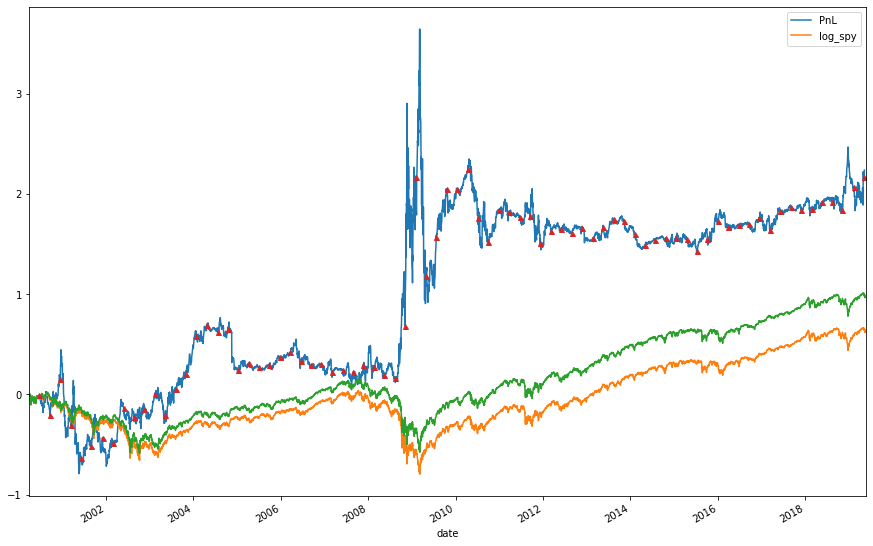

In [138]:
fig = plt.figure(figsize=(20, 15))
strat.pnl.cumsum().plot(figsize=(15, 10))
spy.cumsum().plot(label='log_spy')
plt.legend()
np.corrcoef(strat.pnl.values.T, spy.loc[strat.pnl.index].values)
(np.exp(spy) -1).cumsum().plot()
plt.plot(strat.cal_dates, strat.pnl.cumsum().loc[strat.cal_dates],'^', markersize=5)

In [142]:
strat.fm.n_components_

10

In [144]:
print(df.columns.size)

1025
